In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/baseball/ws_winners_2024_teams.csv'
data = pd.read_csv(file_path)

# Step 3: Drop non-numeric columns and exclude 'ws_winner' from features
numeric_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['ws_winner'])

X = numeric_data  
y = data['ws_winner']  

# Check for missing values
print(f"Total missing values: {numeric_data.isna().sum().sum()}")  

# Fill missing values
X = X.fillna(X.median())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_scaled, y)

# Get feature importances
feature_importances = rf_clf.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Metrics where lower values are better
lower_is_better = ['ERA', 'PH', 'PR', 'PER', 'PHR', 'PBB', 'PIBB']

# Adjust importance for these metrics: since lower values are better, invert the importance for interpretation
important_features['Adjusted Importance'] = important_features.apply(
    lambda row: -row['Importance'] if row['Feature'] in lower_is_better else row['Importance'], axis=1
)

# Sort and display top 10 important features
important_features = important_features.sort_values(by='Adjusted Importance', ascending=False)
print("Top 10 important features (adjusted for metrics where lower is better):")
print(important_features[['Feature', 'Adjusted Importance']].head(10))

# Filter 2024 teams data
team_2024 = data[data['Tm'].str.contains("2024")]

# Extract important features for 2024 teams
team_2024_important = team_2024[X.columns]  

# Scale the features for 2024 teams
team_2024_important_scaled = scaler.transform(team_2024_important)

# Predict win probabilities for 2024 teams
predictions = rf_clf.predict_proba(team_2024_important_scaled)[:, 1]

# Normalize the probabilities so they sum to 1
total_probability = predictions.sum()
normalized_predictions = predictions / total_probability

# Add win probabilities to the dataframe
team_2024['Win_Probability'] = normalized_predictions

# Rank teams by win probability
ranked_teams = team_2024[['Tm', 'Win_Probability']].sort_values(by='Win_Probability', ascending=False)

print("\n2024 Teams Ranked by World Series Win Probability:\n", ranked_teams)


Total missing values: 20
Top 10 important features (adjusted for metrics where lower is better):
   Feature  Adjusted Importance
68    #Fld             0.062809
31     IBB             0.059662
43      CG             0.058155
77       A             0.050588
61    WHIP             0.045514
75      Ch             0.038084
29      SH             0.037508
33      #P             0.035527
42      GF             0.034077
48     H.1             0.031581

2024 Teams Ranked by World Series Win Probability:
                             Tm  Win_Probability
1   2024 Philadelphia Phillies         0.206061
5     2024 Los Angeles Dodgers         0.109091
11         2024 Atlanta Braves         0.103030
0        2024 San Diego Padres         0.096970
6      2024 Kansas City Royals         0.090909
7          2024 Houston Astros         0.084848
8          2024 Detroit Tigers         0.078788
3           2024 New York Mets         0.060606
9     2024 Cleveland Guardians         0.054545
4       2024 Milwa

C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_2444\474600393.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2024['Win_Probability'] = normalized_predictions


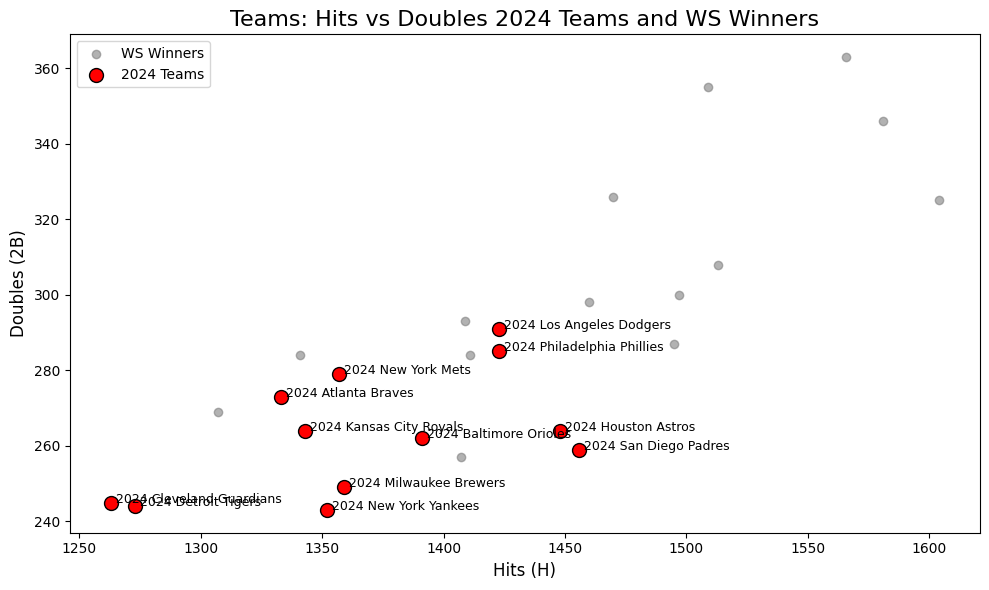

In [19]:
import matplotlib.pyplot as plt

# Step 1: Create the figure
plt.figure(figsize=(10, 6))

# Step 2: Plot all teams, graying out World Series winners
ws_winners = data[data['ws_winner'] == 1]
non_winners = data[data['ws_winner'] == 0]

# Plot non-winners without a label (to exclude from the legend)
plt.scatter(non_winners['H'], non_winners['2B'], color='blue', alpha=0.6)

# Plot World Series winners in gray
plt.scatter(ws_winners['H'], ws_winners['2B'], color='gray', label='WS Winners', alpha=0.6)

# Step 3: Highlight and label the 2024 teams
team_2024 = data[data['Tm'].str.contains("2024")]
plt.scatter(team_2024['H'], team_2024['2B'], color='red', label='2024 Teams', s=100, edgecolor='black')

# Add labels to the 2024 teams
for idx, row in team_2024.iterrows():
    plt.text(row['H'] + 2, row['2B'], row['Tm'], fontsize=9, color='black')

# Step 4: Add labels and title
plt.title('Teams: Hits vs Doubles 2024 Teams and WS Winners', fontsize=16)
plt.xlabel('Hits (H)', fontsize=12)
plt.ylabel('Doubles (2B)', fontsize=12)

# Step 5: Show legend (only for WS Winners and 2024 Teams)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
